# Гипергеометрическое распределение

### Создадим массив с объёмами реализаций выборок

In [18]:
volumes = [5, 10, 100, 1000, 10**5]

In [19]:
count_samples = 5

### Зададим гипергеометрическое распределение $HG(200, 70, 10)$ используя модуль Scipy [1] и выведём первые 2 реализации выборки

In [20]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
N, M, n = (200, 70, 10)
hg = hypergeom(N, n, M)

In [21]:
np.random.seed(1000)
data = {v: np.array([hg.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [22]:
print(data[5])

[[3 3 6 4 4]
 [3 3 2 2 4]
 [4 2 2 5 3]
 [4 7 4 3 3]
 [3 4 3 4 2]]


In [23]:
print(data[10])

[[3 3 2 6 4 4 3 7 5 4]
 [3 1 1 2 5 1 5 2 1 2]
 [1 4 1 6 2 3 4 2 3 2]
 [5 2 2 4 4 2 2 4 7 4]
 [2 3 4 2 6 5 6 3 1 2]]


### Построение эмипирической фунции распределения

In [24]:
def ecdf(x, data):
    return data[data<=x].size / data.size

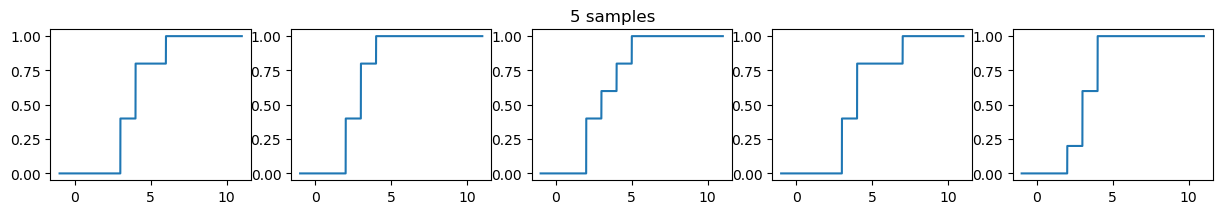

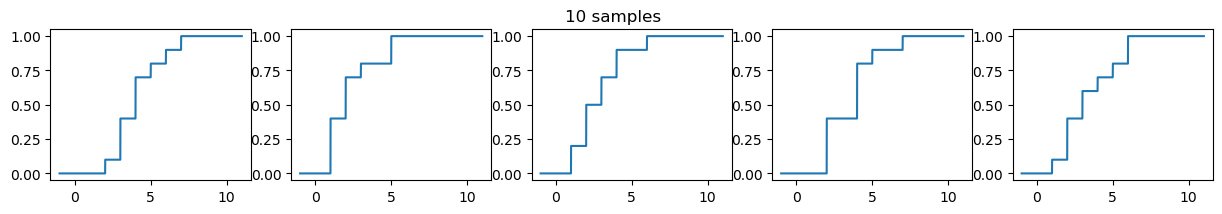

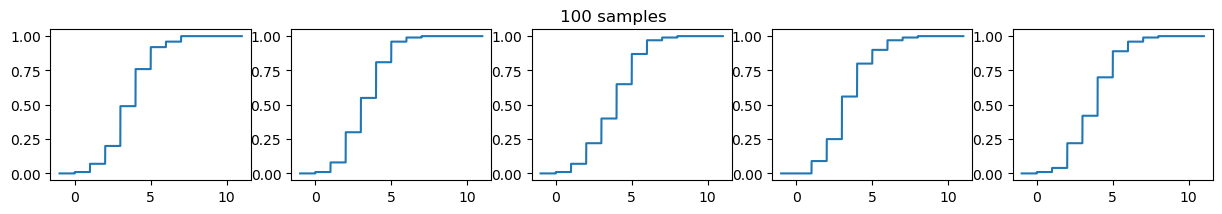

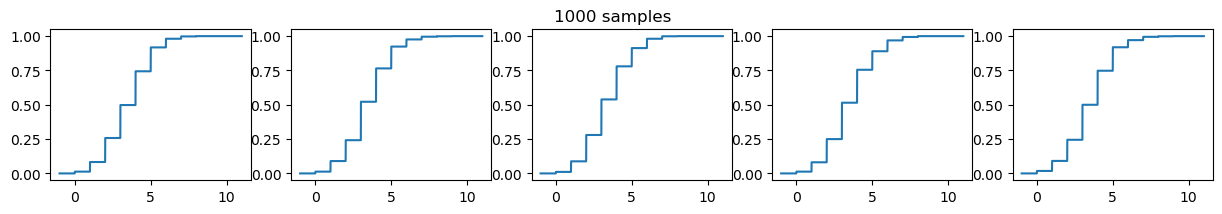

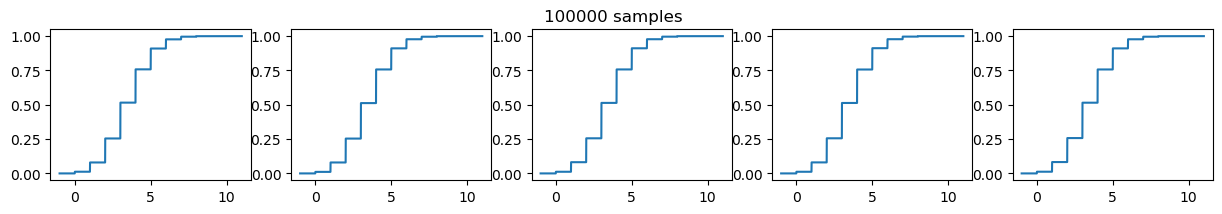

In [25]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [26]:
for volume in data:
    for i in range(len(data[volume])-1):
        for j in range(i+1, len(data[volume])):
            xx = np.arange(-1,11, 0.001)
            print(f"{volume:10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[volume][i])-ecdf(x,data[volume][j])), xx)))}")

         5 samples, sup|F_1 - F_2| = 0.4
         5 samples, sup|F_1 - F_3| = 0.4
         5 samples, sup|F_1 - F_4| = 0.19999999999999996
         5 samples, sup|F_1 - F_5| = 0.2
         5 samples, sup|F_2 - F_3| = 0.20000000000000007
         5 samples, sup|F_2 - F_4| = 0.4
         5 samples, sup|F_2 - F_5| = 0.20000000000000007
         5 samples, sup|F_3 - F_4| = 0.4
         5 samples, sup|F_3 - F_5| = 0.2
         5 samples, sup|F_4 - F_5| = 0.2
        10 samples, sup|F_1 - F_2| = 0.6
        10 samples, sup|F_1 - F_3| = 0.4
        10 samples, sup|F_1 - F_4| = 0.30000000000000004
        10 samples, sup|F_1 - F_5| = 0.30000000000000004
        10 samples, sup|F_2 - F_3| = 0.2
        10 samples, sup|F_2 - F_4| = 0.4
        10 samples, sup|F_2 - F_5| = 0.30000000000000004
        10 samples, sup|F_3 - F_4| = 0.29999999999999993
        10 samples, sup|F_3 - F_5| = 0.20000000000000007
        10 samples, sup|F_4 - F_5| = 0.19999999999999996
       100 samples, sup|F_1 - F_2| =

### Построение вариациооного ряда и поиск квантилей

In [27]:
alphas = [0.1, 0.5, 0.7]

In [28]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[3 3 4 4 6]
 [2 2 3 3 4]
 [2 2 3 4 5]
 [3 3 4 4 7]
 [2 3 3 4 4]]


In [29]:
print(var[10])

[[2 3 3 3 4 4 4 5 6 7]
 [1 1 1 1 2 2 2 3 5 5]
 [1 1 2 2 2 3 3 4 4 6]
 [2 2 2 2 4 4 4 4 5 7]
 [1 2 2 2 3 3 4 5 6 6]]


In [30]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        print()
    print()

α=0.1
     5 samples, x_α=3
     5 samples, x_α=2
     5 samples, x_α=2
     5 samples, x_α=3
     5 samples, x_α=3

    10 samples, x_α=3
    10 samples, x_α=1
    10 samples, x_α=2
    10 samples, x_α=2
    10 samples, x_α=2

   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2
   100 samples, x_α=2

  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2
  1000 samples, x_α=2

100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2
100000 samples, x_α=2


α=0.5
     5 samples, x_α=4
     5 samples, x_α=3
     5 samples, x_α=4
     5 samples, x_α=4
     5 samples, x_α=4

    10 samples, x_α=4
    10 samples, x_α=2
    10 samples, x_α=3
    10 samples, x_α=4
    10 samples, x_α=4

   100 samples, x_α=4
   100 samples, x_α=3
   100 samples, x_α=4
   100 samples, x_α=3
   100 samples, x_α=4

  1000 samples, x_α=4
  1000 samples, x_α=3
  1000 samples, x_α=3
  1000 samples, x_α=3
  1000 samp

### Проверка реального значения квантиля

In [31]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return int(xx+eps)

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(hg.cdf, a)}")

α=0.1, x_α=2
α=0.5, x_α=3
α=0.7, x_α=4


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

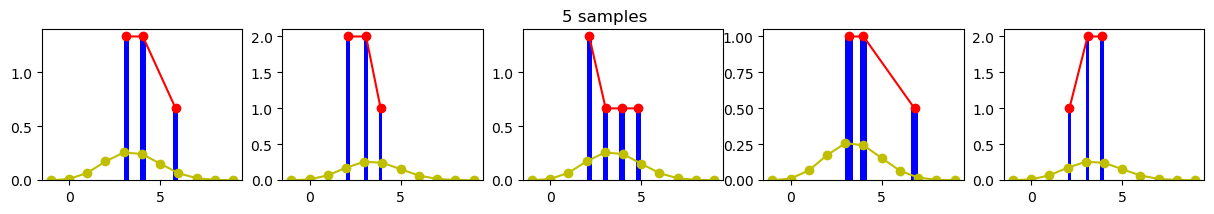

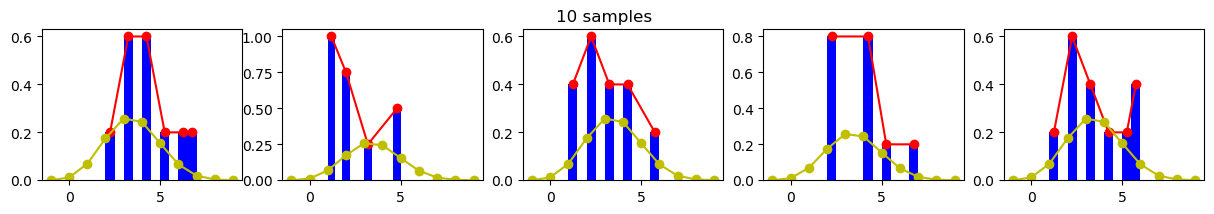

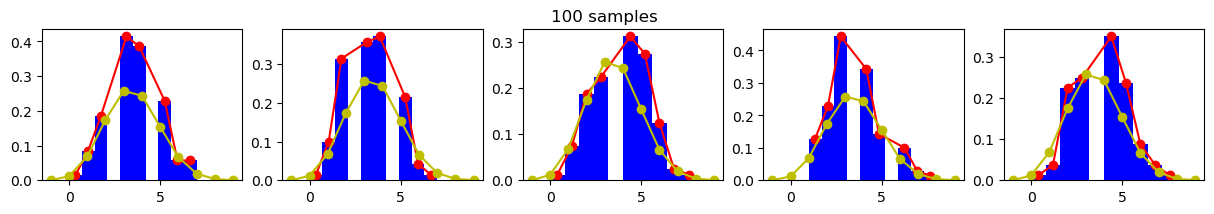

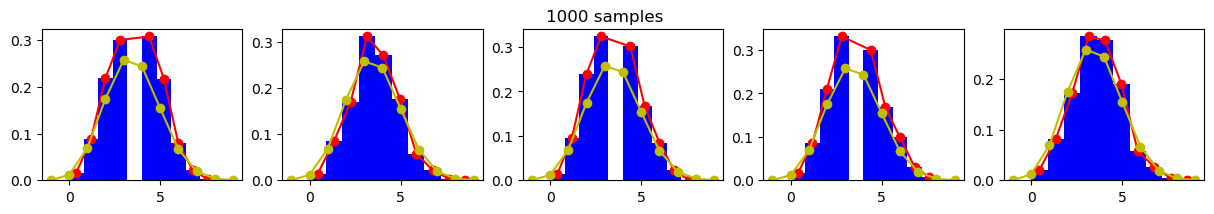

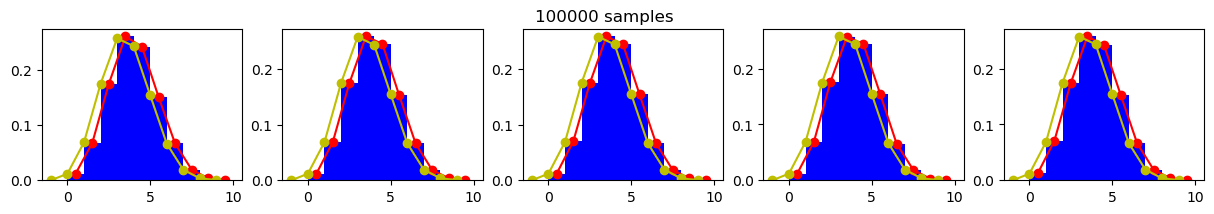

In [32]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n)
        pmf = hg.pmf(x)
        ax[i].plot(x, pmf, '-yo')
        ax[i].plot   

# Гамма распределение


### Создадим массив с объёмами реализаций выборок

In [33]:
volumes = [5, 10, 100, 1000, 10**5]

In [34]:
count_samples = 5

### Зададим Гамма распределение $Г(2, 1/2)$ используя модуль Scipy и выведём первые 2 реализации выборки

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
%matplotlib inline

a, th = 2, 1/2 
g = gamma(a, scale=1/th)

In [36]:
np.random.seed(1000)
data = {v: np.array([g.rvs(size=v) for _ in range(count_samples)]) for v in volumes}

In [37]:
print(data[5])

[[ 1.65779518  4.23253634  2.61543719  4.4434691   5.11784167]
 [ 2.27175424  1.10063895  2.39117904  2.98855088  5.50758889]
 [ 7.81343373  1.3795498   4.49910958  6.31528741  2.10502947]
 [ 2.43869163  3.15763064  3.55282825  2.6073988  11.17186093]
 [ 3.13433356  2.04499802  1.30398589  5.31053422  1.22752228]]


In [38]:
print(data[10])

[[ 2.89441043  1.20872703  1.76109075  0.46375205  1.92600213  1.60826366
   0.59279772  0.30470021  0.8292591   4.1435157 ]
 [ 3.12604595  6.07351191  1.45216596  2.47110109  0.74434887  1.33799976
  11.89658743  1.01658773  8.28914145  5.92916557]
 [ 8.6748626   5.36923032  6.12009283  1.13460474  9.35698124  2.70992251
   2.42368729  2.04755191  2.07066149  6.55480712]
 [ 4.60687922  1.37144017  5.71380571  5.23180412  5.69025798  1.11063006
   1.39095617  0.39978799  2.24414508  5.45108824]
 [ 4.23389048  2.01088872  2.91406584  0.87350208  2.81248876  2.0708202
   3.22143761  2.28571851  4.32522799  1.37329683]]


### Построение эмипирической фунции распределения

In [39]:
def ecdf(x, data):
    return data[data<=x].size / data.size

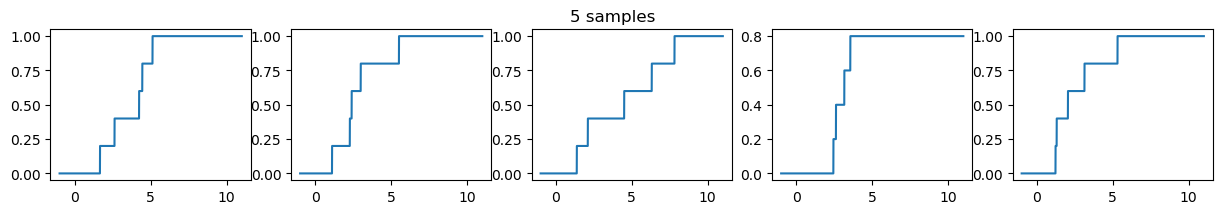

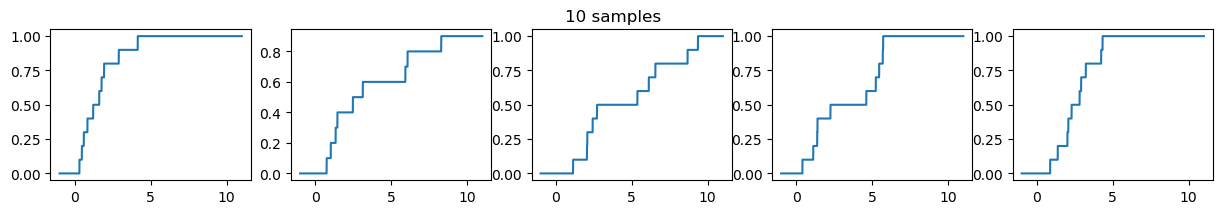

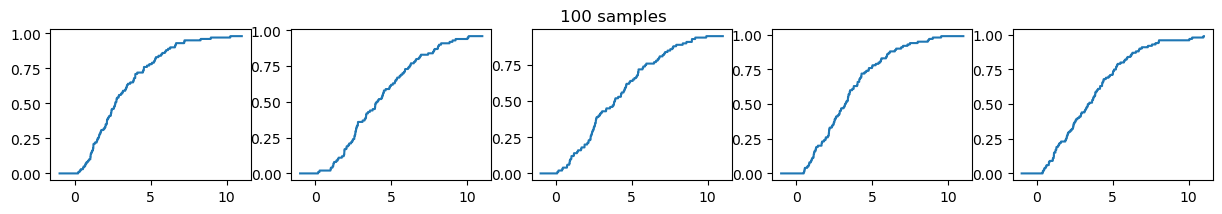

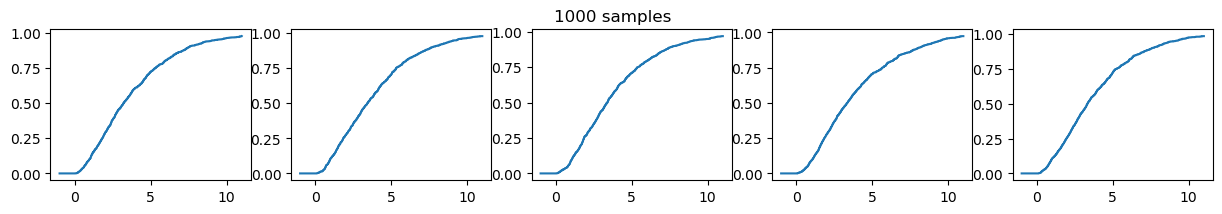

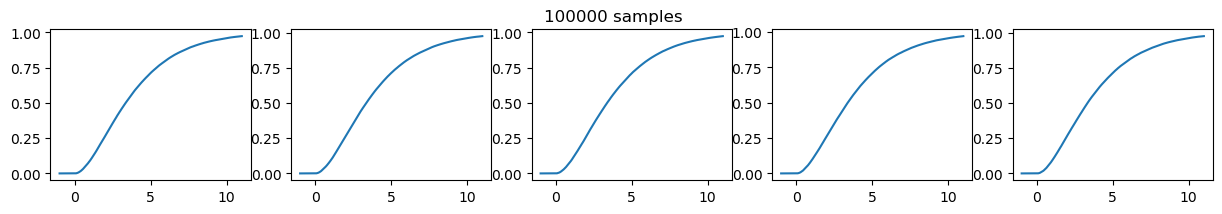

In [40]:
x = np.arange(-1,11, 0.001)
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        y = list(map(lambda e: ecdf(e, data[volume][i]) , x))
        ax[i].plot(x, y)

### Расчёт верхнтх границ разностей каждой пары эмпирических функций распределения

In [41]:
for volume in data:
    for i in range(len(data[volume])-1):
        for j in range(i+1, len(data[volume])):
            xx = np.arange(-1,11, 0.001)
            print(f"{volume:10} samples, sup|F_{i+1} - F_{j+1}| = {max(list(map(lambda x: abs(ecdf(x,data[volume][i])-ecdf(x,data[volume][j])), xx)))}")

         5 samples, sup|F_1 - F_2| = 0.4
         5 samples, sup|F_1 - F_3| = 0.4
         5 samples, sup|F_1 - F_4| = 0.4
         5 samples, sup|F_1 - F_5| = 0.4
         5 samples, sup|F_2 - F_3| = 0.4
         5 samples, sup|F_2 - F_4| = 0.6
         5 samples, sup|F_2 - F_5| = 0.39999999999999997
         5 samples, sup|F_3 - F_4| = 0.4
         5 samples, sup|F_3 - F_5| = 0.4
         5 samples, sup|F_4 - F_5| = 0.6
        10 samples, sup|F_1 - F_2| = 0.4
        10 samples, sup|F_1 - F_3| = 0.7000000000000001
        10 samples, sup|F_1 - F_4| = 0.5
        10 samples, sup|F_1 - F_5| = 0.6000000000000001
        10 samples, sup|F_2 - F_3| = 0.30000000000000004
        10 samples, sup|F_2 - F_4| = 0.4
        10 samples, sup|F_2 - F_5| = 0.4
        10 samples, sup|F_3 - F_4| = 0.4
        10 samples, sup|F_3 - F_5| = 0.5
        10 samples, sup|F_4 - F_5| = 0.5
       100 samples, sup|F_1 - F_2| = 0.23000000000000004
       100 samples, sup|F_1 - F_3| = 0.19
       100 samples,

### Построение вариациооного ряда и поиск квантилей

In [42]:
alphas = [0.1, 0.5, 0.7]

In [43]:
var = {key: np.array([(sorted(v)) for v in value]) for key, value in data.items()}
print(var[5])

[[ 1.65779518  2.61543719  4.23253634  4.4434691   5.11784167]
 [ 1.10063895  2.27175424  2.39117904  2.98855088  5.50758889]
 [ 1.3795498   2.10502947  4.49910958  6.31528741  7.81343373]
 [ 2.43869163  2.6073988   3.15763064  3.55282825 11.17186093]
 [ 1.22752228  1.30398589  2.04499802  3.13433356  5.31053422]]


In [44]:
print(var[10])

[[ 0.30470021  0.46375205  0.59279772  0.8292591   1.20872703  1.60826366
   1.76109075  1.92600213  2.89441043  4.1435157 ]
 [ 0.74434887  1.01658773  1.33799976  1.45216596  2.47110109  3.12604595
   5.92916557  6.07351191  8.28914145 11.89658743]
 [ 1.13460474  2.04755191  2.07066149  2.42368729  2.70992251  5.36923032
   6.12009283  6.55480712  8.6748626   9.35698124]
 [ 0.39978799  1.11063006  1.37144017  1.39095617  2.24414508  4.60687922
   5.23180412  5.45108824  5.69025798  5.71380571]
 [ 0.87350208  1.37329683  2.01088872  2.0708202   2.28571851  2.81248876
   2.91406584  3.22143761  4.23389048  4.32522799]]


In [45]:
for a in alphas:
    print(f"α={a}")
    for key, samples in var.items():
        x_alphas = []
        for sample in samples:
            x_alphas += [sample[int(a*len(sample) + 1)]]
            print(f"{key:6} samples, x_α={x_alphas[-1]}")
        print()
    print()

α=0.1
     5 samples, x_α=2.615437187896309
     5 samples, x_α=2.2717542428916198
     5 samples, x_α=2.105029467228849
     5 samples, x_α=2.6073987997868127
     5 samples, x_α=1.3039858870939327

    10 samples, x_α=0.5927977249863509
    10 samples, x_α=1.3379997584662577
    10 samples, x_α=2.0706614910364656
    10 samples, x_α=1.371440165369265
    10 samples, x_α=2.0108887173009977

   100 samples, x_α=1.0259586325782242
   100 samples, x_α=1.74945708095864
   100 samples, x_α=1.0258175321069003
   100 samples, x_α=1.1146930994006639
   100 samples, x_α=1.111038808403205

  1000 samples, x_α=0.9781080112869849
  1000 samples, x_α=0.977837938378552
  1000 samples, x_α=1.0748331154790218
  1000 samples, x_α=1.0767261548420446
  1000 samples, x_α=0.9795543743687662

100000 samples, x_α=1.0625740606234644
100000 samples, x_α=1.0649463259257852
100000 samples, x_α=1.0696200948094499
100000 samples, x_α=1.0586080709733838
100000 samples, x_α=1.0604068805671205


α=0.5
     5 samples

### Проверка реального значения квантиля

In [46]:
def compute_quntile(cdf, a, eps=0.001):
    x = np.arange(-1, 13, eps)
    for xx in x:
        if cdf(xx)<a and cdf(xx+eps)>a:
            return xx+eps

for a in alphas:
    x = np.arange(-1, 13, 0.001)
    print(f"α={a}, x_α={compute_quntile(g.cdf, a)}")

α=0.1, x_α=1.0640000000000018
α=0.5, x_α=3.3570000000000033
α=0.7, x_α=4.879000000000006


### Построение гистограммы частот, полигона частот и сравнение значений с функцией распределения

Красная линия - линия полигона частот, жёлтая - функция распределения

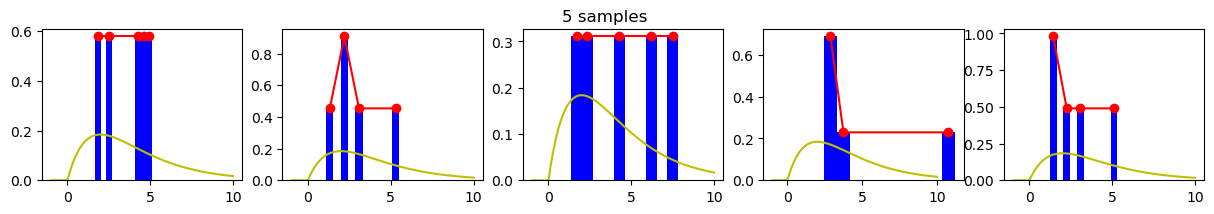

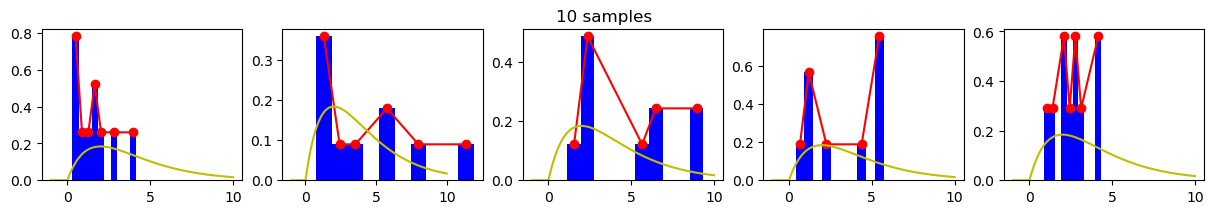

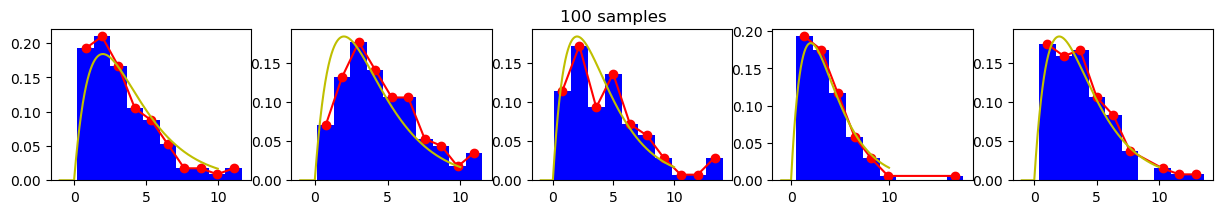

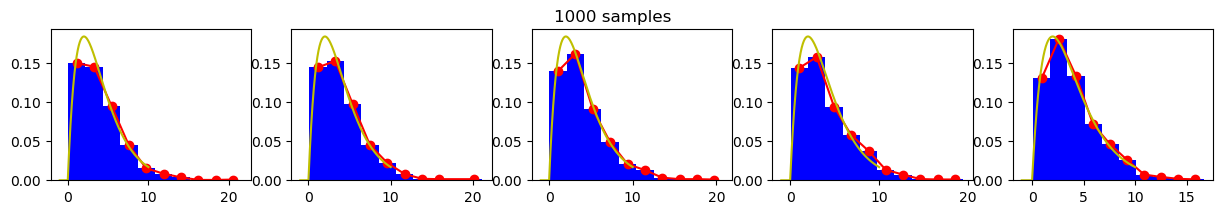

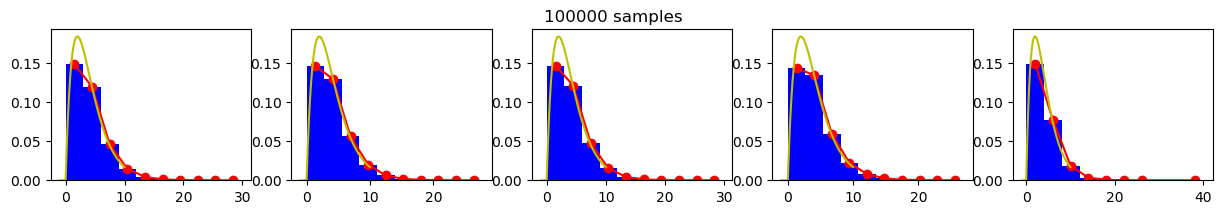

In [47]:
for volume in data:
    fig, ax = plt.subplots(1, 5, figsize=(15, 2), dpi=100)
    fig.suptitle(f"{volume} samples")
    for i in range(len(volumes)):
        counts, bins = np.histogram(data[volume][i])
        ns, bns, _ = ax[i].hist(bins[:-1], bins=bins, weights=counts, density=True, color="b")
        bns = np.array(bns)
        x = bns[:-1] + (bns[1:] - bns[:-1])/2
        x = [x[i] for i in range(len(ns))  if ns[i]!=0 ]
        y = [ns[i] for i in range(len(ns))  if ns[i]!=0 ]
        ax[i].plot(x, y, "-ro")
        x = np.arange(-1, n, 0.001)
        pdf = g.pdf(x)
        ax[i].plot(x, pdf, '-y')
        ax[i].plot   